**Crop Recommendation**

In [1]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the dataset

crop_data=pd.read_csv("Crop_recommendation.csv")
crop_data.head(10)

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
5  69  37  42    23.058049  83.370118  7.073454  251.055000  rice
6  69  55  38    22.708838  82.639414  5.700806  271.324860  rice
7  94  53  40    20.277744  82.894086  5.718627  241.974195  rice
8  89  54  38    24.515881  83.535216  6.685346  230.446236  rice
9  68  58  38    23.223974  83.033227  6.336254  221.209196  rice

In [3]:
crop_data.tail(10)

N   P   K  temperature   humidity        ph    rainfall   label
2190  103  40  30    27.309018  55.196224  6.348316  141.483164  coffee
2191  118  31  34    27.548230  62.881792  6.123796  181.417081  coffee
2192  106  21  35    25.627355  57.041511  7.428524  188.550654  coffee
2193  116  38  34    23.292503  50.045570  6.020947  183.468585  coffee
2194   97  35  26    24.914610  53.741447  6.334610  166.254931  coffee
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

In [4]:
crop_data.shape

(2200, 8)

In [5]:
#Dataset information
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
# dataset columns
crop_data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [7]:
#changing column name label to crop
crop_data.rename(columns = {'label':'crop'}, inplace = True)
crop_data

N   P   K  temperature   humidity        ph    rainfall    crop
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]

In [8]:
# statistical information of the dataset

crop_data.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [9]:
#Finding number of null shells for each column
crop_data.isnull().sum()


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
crop           0
dtype: int64

In [10]:
crop_data.isnull().values.any()

False

In [11]:
# Visualizing the features

ax = sns.pairplot(crop_data)


In [12]:
crop_data.crop.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [13]:
len(crop_data.crop.unique().tolist())

22

In [14]:
# get top 5 most frequent growing crops
n = 5
crop_data['crop'].value_counts()[:5].index.tolist()

['rice', 'maize', 'jute', 'cotton', 'coconut']

In [15]:
#To get unique colors for each field
palette = sns.color_palette("husl", len(crop_data["crop"].unique()))

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'rice'),
  Text(1, 0, 'maize'),
  Text(2, 0, 'chickpea'),
  Text(3, 0, 'kidneybeans'),
  Text(4, 0, 'pigeonpeas'),
  Text(5, 0, 'mothbeans'),
  Text(6, 0, 'mungbean'),
  Text(7, 0, 'blackgram'),
  Text(8, 0, 'lentil'),
  Text(9, 0, 'pomegranate'),
  Text(10, 0, 'banana'),
  Text(11, 0, 'mango'),
  Text(12, 0, 'grapes'),
  Text(13, 0, 'watermelon'),
  Text(14, 0, 'muskmelon'),
  Text(15, 0, 'apple'),
  Text(16, 0, 'orange'),
  Text(17, 0, 'papaya'),
  Text(18, 0, 'coconut'),
  Text(19, 0, 'cotton'),
  Text(20, 0, 'jute'),
  Text(21, 0, 'coffee')])

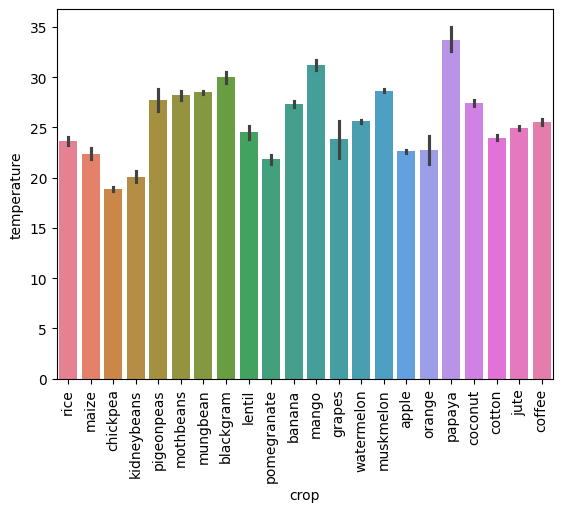

In [16]:
#
sns.barplot(x=crop_data["crop"], y=crop_data["temperature"],hue=crop_data["crop"],palette=palette)
plt.xticks(rotation = 90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'rice'),
  Text(1, 0, 'maize'),
  Text(2, 0, 'chickpea'),
  Text(3, 0, 'kidneybeans'),
  Text(4, 0, 'pigeonpeas'),
  Text(5, 0, 'mothbeans'),
  Text(6, 0, 'mungbean'),
  Text(7, 0, 'blackgram'),
  Text(8, 0, 'lentil'),
  Text(9, 0, 'pomegranate'),
  Text(10, 0, 'banana'),
  Text(11, 0, 'mango'),
  Text(12, 0, 'grapes'),
  Text(13, 0, 'watermelon'),
  Text(14, 0, 'muskmelon'),
  Text(15, 0, 'apple'),
  Text(16, 0, 'orange'),
  Text(17, 0, 'papaya'),
  Text(18, 0, 'coconut'),
  Text(19, 0, 'cotton'),
  Text(20, 0, 'jute'),
  Text(21, 0, 'coffee')])

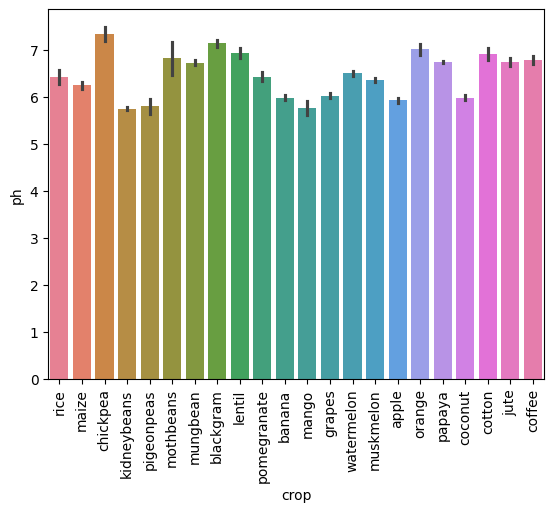

In [17]:
sns.barplot(x=crop_data["crop"], y=crop_data["ph"],hue=crop_data["crop"],palette=palette)
plt.xticks(rotation = 90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'rice'),
  Text(1, 0, 'maize'),
  Text(2, 0, 'chickpea'),
  Text(3, 0, 'kidneybeans'),
  Text(4, 0, 'pigeonpeas'),
  Text(5, 0, 'mothbeans'),
  Text(6, 0, 'mungbean'),
  Text(7, 0, 'blackgram'),
  Text(8, 0, 'lentil'),
  Text(9, 0, 'pomegranate'),
  Text(10, 0, 'banana'),
  Text(11, 0, 'mango'),
  Text(12, 0, 'grapes'),
  Text(13, 0, 'watermelon'),
  Text(14, 0, 'muskmelon'),
  Text(15, 0, 'apple'),
  Text(16, 0, 'orange'),
  Text(17, 0, 'papaya'),
  Text(18, 0, 'coconut'),
  Text(19, 0, 'cotton'),
  Text(20, 0, 'jute'),
  Text(21, 0, 'coffee')])

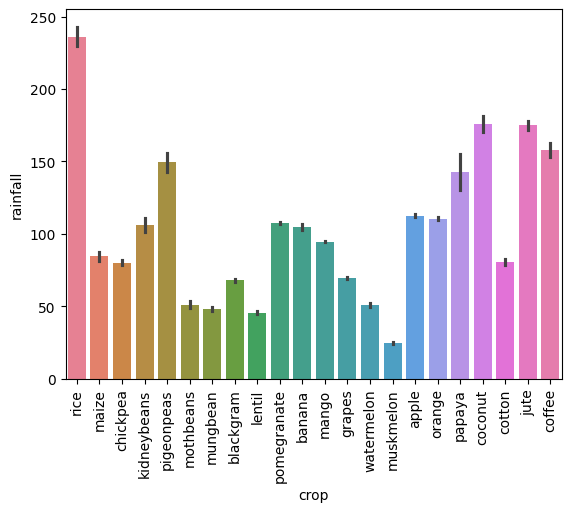

In [18]:
sns.barplot(x=crop_data["crop"], y=crop_data["rainfall"],hue=crop_data["crop"],palette=palette)
plt.xticks(rotation = 90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'rice'),
  Text(1, 0, 'maize'),
  Text(2, 0, 'chickpea'),
  Text(3, 0, 'kidneybeans'),
  Text(4, 0, 'pigeonpeas'),
  Text(5, 0, 'mothbeans'),
  Text(6, 0, 'mungbean'),
  Text(7, 0, 'blackgram'),
  Text(8, 0, 'lentil'),
  Text(9, 0, 'pomegranate'),
  Text(10, 0, 'banana'),
  Text(11, 0, 'mango'),
  Text(12, 0, 'grapes'),
  Text(13, 0, 'watermelon'),
  Text(14, 0, 'muskmelon'),
  Text(15, 0, 'apple'),
  Text(16, 0, 'orange'),
  Text(17, 0, 'papaya'),
  Text(18, 0, 'coconut'),
  Text(19, 0, 'cotton'),
  Text(20, 0, 'jute'),
  Text(21, 0, 'coffee')])

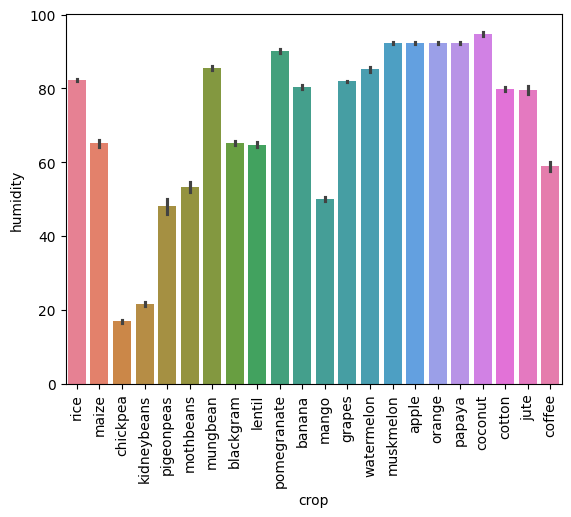

In [19]:
sns.barplot(x=crop_data["crop"], y=crop_data["humidity"],hue=crop_data["crop"],palette=palette)
plt.xticks(rotation = 90)

Text(0.5, 1.0, 'Correlation Matrix')

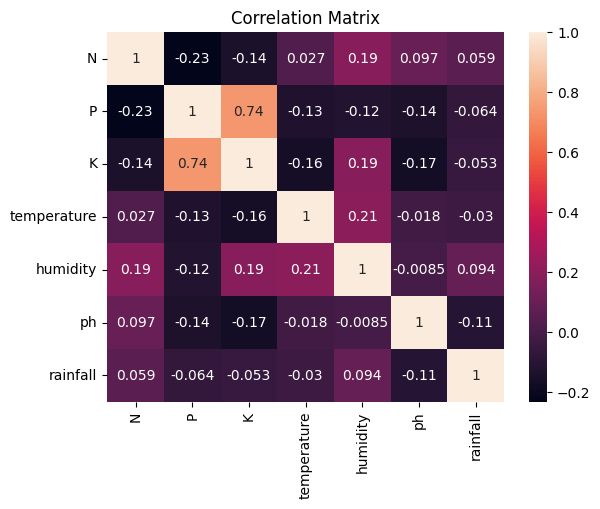

In [20]:
sns.heatmap(crop_data.corr(numeric_only=True), annot =True)
plt.title('Correlation Matrix')

In [21]:
# Shuffling data to remove order effects that influence the outcome

from sklearn.utils import shuffle

df  = shuffle(crop_data,random_state=5)
df.head(10)

N    P    K  temperature   humidity        ph    rainfall         crop
1270   6  140  205    17.665584  82.929034  6.313086   69.867126       grapes
1481  98   22   47    29.072653  91.915332  6.341401   28.835684    muskmelon
1832  38   14   30    26.924495  91.201060  5.570745  194.902214      coconut
293   35   63   76    17.815645  17.607566  7.714153   90.820976     chickpea
1307  85   22   53    25.965342  89.770767  6.849472   59.463386   watermelon
1774  70   50   53    37.462091  90.449678  6.933810  172.345845       papaya
1763  70   65   52    30.420121  93.126598  6.583529   75.952950       papaya
994   32   25   35    18.099032  85.707863  5.892914  107.005098  pomegranate
424   16   71   24    18.331248  38.409755  4.946370  139.648332   pigeonpeas
1532  11  143  197    22.984589  93.320449  5.875719  122.195248        apple

**Encoding**

In [22]:
crop_data.head()

N   P   K  temperature   humidity        ph    rainfall  crop
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [23]:
X=df.drop(['crop'],axis='columns')
X

N    P    K  temperature   humidity        ph    rainfall
1270    6  140  205    17.665584  82.929034  6.313086   69.867126
1481   98   22   47    29.072653  91.915332  6.341401   28.835684
1832   38   14   30    26.924495  91.201060  5.570745  194.902214
293    35   63   76    17.815645  17.607566  7.714153   90.820976
1307   85   22   53    25.965342  89.770767  6.849472   59.463386
...   ...  ...  ...          ...        ...       ...         ...
740    24   80   19    29.678925  69.085455  6.808042   65.664366
1032  105   74   45    25.145176  81.382041  6.098369  119.218154
2121   83   21   28    25.567483  60.492446  7.466901  190.225784
1424  102   25   50    28.204808  92.914404  6.099662   20.360011
1725   47   46   52    23.194511  91.403016  6.502289  206.399921

[2200 rows x 7 columns]

In [24]:
target=df['crop']
y=pd.get_dummies(target)
y

apple  banana  blackgram  chickpea  coconut  coffee  cotton  grapes  \
1270  False   False      False     False    False   False   False    True   
1481  False   False      False     False    False   False   False   False   
1832  False   False      False     False     True   False   False   False   
293   False   False      False      True    False   False   False   False   
1307  False   False      False     False    False   False   False   False   
...     ...     ...        ...       ...      ...     ...     ...     ...   
740   False   False       True     False    False   False   False   False   
1032  False    True      False     False    False   False   False   False   
2121  False   False      False     False    False    True   False   False   
1424  False   False      False     False    False   False   False   False   
1725  False   False      False     False    False   False   False   False   

       jute  kidneybeans  ...  mango  mothbeans  mungbean  muskmelon  orange  \
1270  False        False  ...  False      False     False      False   False   
1481  False        False  ...  False      False     False       True   False   
1832  False        False  ...  False      False     False      False   False   
293   False        False  ...  False      False     False      False   False   
1307  False        False  ...  False      False     False      False   False   
...     ...          ...  ...    ...        ...       ...        ...     ...   
740   False        False  ...  False      False     False      False   False   
1032  False        False  ...  False      False     False      False   False   
2121  False        False  ...  False      False     False      False   False   
1424  False        False  ...  False      False     False       True   False   
1725  False        False  ...  False      False     False      False   False   

      papaya  pigeonpeas  pomegranate   rice  watermelon  
1270   False       False        False  False       False  
1481   False       False        False  False       False  
1832   False       False        False  False       False  
293    False       False        False  False       False  
1307   False       False        False  False        True  
...      ...         ...          ...    ...         ...  
740    False       False        False  False       False  
1032   False       False        False  False       False  
2121   False       False        False  False       False  
1424   False       False        False  False       False  
1725    True       False        False  False       False  

[2200 rows x 22 columns]

In [25]:
y.columns

Index(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize', 'mango',
       'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya', 'pigeonpeas',
       'pomegranate', 'rice', 'watermelon'],
      dtype='object')

In [26]:
# Splitting data set - 25% test dataset and 75%


from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state= 0)

print("x_train :",X_train.shape)
print("x_test :",X_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (1650, 7)
x_test : (550, 7)
y_train : (1650, 22)
y_test : (550, 22)


In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# accuracy score and classification report of knn
knn_acc_train=accuracy_score(y_train, knn.predict(X_train))
knn_acc_test = accuracy_score(y_test, knn.predict(X_test))

print("Training Accuracy of KNN is: {:.3f}".format(knn_acc_train))
print("Test Accuracy of KNN is: {:.3f}".format(knn_acc_test))

Training Accuracy of KNN is: 0.987
Test Accuracy of KNN is: 0.975


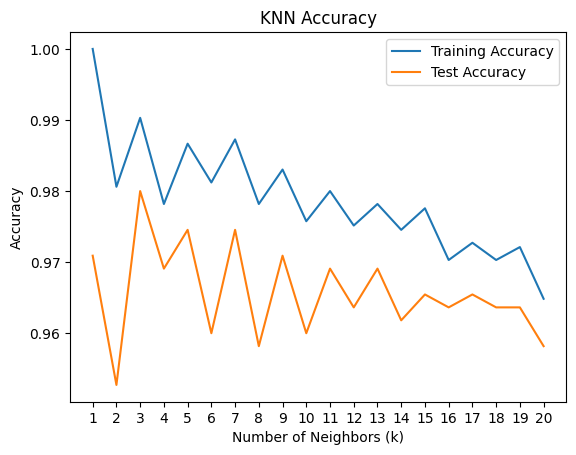

In [28]:


# Define a range of k values
k_values = range(1, 21)  # You can adjust the range as needed

# Initialize lists to store training and test accuracies
train_accuracies = []
test_accuracies = []

# Loop through different values of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training and test accuracies
    train_acc = accuracy_score(y_train, knn.predict(X_train))
    test_acc = accuracy_score(y_test, knn.predict(X_test))
    
    # Append accuracies to lists
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plotting the graph
plt.plot(k_values, train_accuracies, label='Training Accuracy')
plt.plot(k_values, test_accuracies, label='Test Accuracy')
plt.title('KNN Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(k_values)

plt.show()


In [29]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree
dtc_acc_train=accuracy_score(y_train, dtc.predict(X_train))
dtc_acc_test = accuracy_score(y_test, dtc.predict(X_test))

print("Training Accuracy of Decision Tree Classifier is: {:.3f}".format(dtc_acc_train))
print("Test Accuracy of Decision Tree Classifier is: {:.3f}".format(dtc_acc_test))


Training Accuracy of Decision Tree Classifier is: 1.000
Test Accuracy of Decision Tree Classifier is: 0.995


In [30]:


# Define a range of tree depths
depths = range(1, 21)  # You can adjust the range as needed

# Initialize lists to store training and test accuracies
train_accuracies = []
test_accuracies = []

# Loop through different depths
for depth in depths:
    dtc = DecisionTreeClassifier(max_depth=depth)
    dtc.fit(X_train, y_train)
    
    # Calculate training and test accuracies
    train_acc = accuracy_score(y_train, dtc.predict(X_train))
    test_acc = accuracy_score(y_test, dtc.predict(X_test))
    # Append accuracies to lists
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plotting the graph
plt.plot(depths, train_accuracies, label='Training Accuracy', marker='o', linestyle='-')
plt.plot(depths, test_accuracies, label='Test Accuracy', marker='o', linestyle='-')
plt.title('Decision Tree Classifier Accuracy vs Depth')
plt.xlabel('Max Depth of Tree')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [31]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of random forest
rd_clf_acc_train=accuracy_score(y_train, rd_clf.predict(X_train))
rd_clf_acc_test = accuracy_score(y_test, rd_clf.predict(X_test))

print("Training Accuracy of Random Forest Classifier is: {:.3f}".format(rd_clf_acc_train))
print("Test Accuracy of Random Forest Classifier is: {:.3f}".format(rd_clf_acc_test))

Training Accuracy of Random Forest Classifier is: 1.000
Test Accuracy of Random Forest Classifier is: 0.996


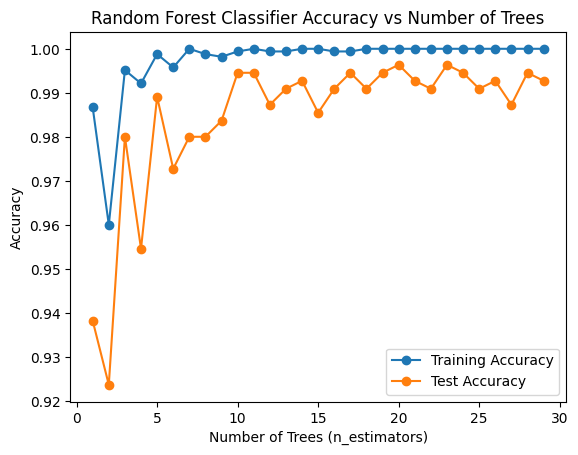

In [32]:

# Define a range of numbers of trees
n_estimators_values = range(1, 30)  # You can adjust the range as needed

# Initialize lists to store training and test accuracies
train_accuracies = []
test_accuracies = []

# Loop through different numbers of trees
for n_estimators in n_estimators_values:
    rd_clf = RandomForestClassifier(n_estimators=n_estimators)
    rd_clf.fit(X_train, y_train)
    
    # Calculate training and test accuracies
    train_acc = accuracy_score(y_train, rd_clf.predict(X_train))
    test_acc = accuracy_score(y_test, rd_clf.predict(X_test))
    # Append accuracies to lists
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plotting the graph
plt.plot(n_estimators_values, train_accuracies, label='Training Accuracy', marker='o', linestyle='-')
plt.plot(n_estimators_values, test_accuracies, label='Test Accuracy', marker='o', linestyle='-')
plt.title('Random Forest Classifier Accuracy vs Number of Trees')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [33]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree', 'Random Forest'],
    'Accuracy' : [knn_acc_test, dtc_acc_test, rd_clf_acc_test]
})


models.sort_values(by = 'Accuracy', ascending = False)

Model  Accuracy
2  Random Forest  0.996364
1  Decision Tree  0.994545
0            KNN  0.974545

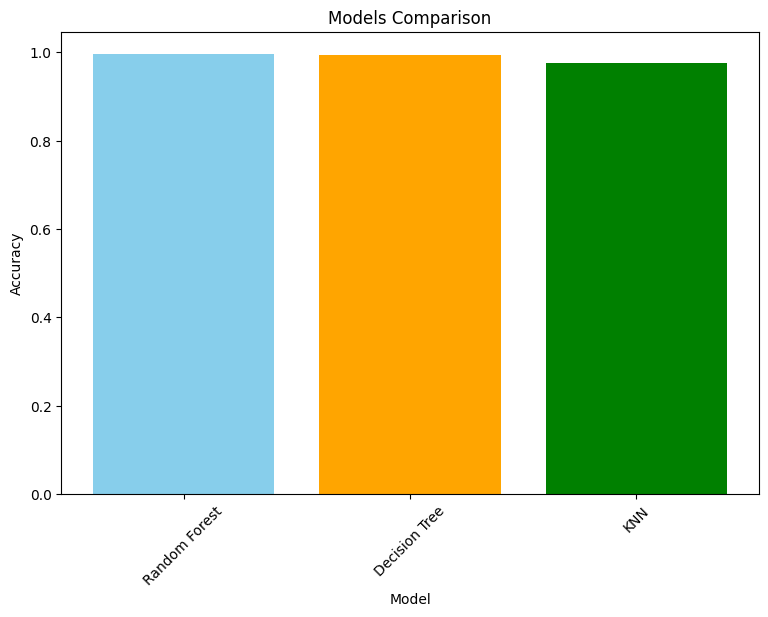

In [34]:
import numpy as np
models_sorted = models.sort_values(by='Accuracy', ascending=False)

# Define colors for each model
colors = ['skyblue', 'orange', 'green', 'red', 'purple']  # Add more colors as needed

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(9, 6))

# Create a bar plot with different colors for each model
bars = ax.bar(models_sorted['Model'], models_sorted['Accuracy'], color=colors)

# Customize plot
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Models Comparison')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show plot
plt.show()


In [35]:
crop_array=['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize', 'mango',
       'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya', 'pigeonpeas',
       'pomegranate', 'rice', 'watermelon']

In [36]:
def recommendation(N,P,k,temperature,humidity,ph,rainfal):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfal]])
    prediction = dtpickle.predict(features).reshape(1,-1)
    print(prediction)
    return prediction

In [39]:
import pickle
pickle.dump(rd_clf,open('Randomforest_pkl','wb'))

In [45]:
dtpickle = pickle.load(open('Randomforest_pkl','rb'))

In [46]:
predicted_data=dtpickle.predict(X_test)

In [47]:
for inner_array in predicted_data:
    if np.any(inner_array == 1):
        index = np.where(inner_array == 1)[0][0]
        crop = crop_array[index]
        print("{} is a best crop to be cultivated ".format(crop))



pigeonpeas is a best crop to be cultivated 
rice is a best crop to be cultivated 
cotton is a best crop to be cultivated 
muskmelon is a best crop to be cultivated 
muskmelon is a best crop to be cultivated 
jute is a best crop to be cultivated 
muskmelon is a best crop to be cultivated 
mango is a best crop to be cultivated 
mungbean is a best crop to be cultivated 
mungbean is a best crop to be cultivated 
kidneybeans is a best crop to be cultivated 
orange is a best crop to be cultivated 
coconut is a best crop to be cultivated 
apple is a best crop to be cultivated 
kidneybeans is a best crop to be cultivated 
mango is a best crop to be cultivated 
grapes is a best crop to be cultivated 
jute is a best crop to be cultivated 
grapes is a best crop to be cultivated 
orange is a best crop to be cultivated 
blackgram is a best crop to be cultivated 
banana is a best crop to be cultivated 
coffee is a best crop to be cultivated 
maize is a best crop to be cultivated 
maize is a best cro

In [48]:
N = 23
P = 6
k = 33
temperature = 29.18
humidity = 92.73
ph = 6.0
rainfall = 204.9

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)
predict=np.array(predict)
for inner_array in predict:
    if np.any(inner_array == 1):
        index = np.where(inner_array == 1)[0][0]
        crop = crop_array[index]
        break

print("{} is a best crop to be cultivated ".format(crop))

[[False False False False  True False False False False False False False
  False False False False False False False False False False]]
coconut is a best crop to be cultivated 
